In [64]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# Parameters
N = 64
steps = 60

In [66]:
# Initial state
psi = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        psi[i][j] = 1/np.sqrt(N*N)
print(psi)

[[0.015625 0.015625 0.015625 ... 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 ... 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 ... 0.015625 0.015625 0.015625]
 ...
 [0.015625 0.015625 0.015625 ... 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 ... 0.015625 0.015625 0.015625]
 [0.015625 0.015625 0.015625 ... 0.015625 0.015625 0.015625]]


In [67]:
# Specify the marked vertex
a = 0

In [68]:
# Create an array to store the probabilities.
prob = np.zeros(steps+1)

# Print the probability at the marked vertex
prob[0] = np.sum(np.square(psi[a][:]));
#print(0,"\t",prob[0])

for t in range(steps):
    # Query the oracle.
    for i in range(N):
        psi[a][i] *= -1
    
    # Temporary variable.
    tmp = np.zeros((N,N))

    # Apply the Grover coin
    for i in range(N):
        # Calculate the average amplitude at this vertex.
        avg = 0
        for j in range(N):
            avg += psi[i][j]
        avg /= N
    
        # Invert each amplitude about this average.
        for j in range(N):
            tmp[i][j] = 2*avg - psi[i][j]
    
    # Flip-Flop Shift
    for i in range(N):
        for j in range(N):
            psi[i][j] = tmp[j][i]
            
    # Print the probability at the marked vertex
    prob[t+1] =  np.sum(np.square(psi[a][:]))
    #print(t+1,"\t",prob[t+1])

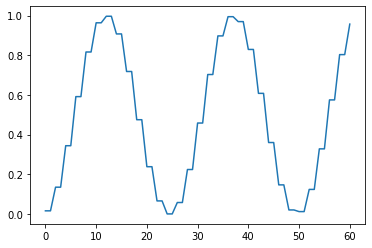

In [69]:
plt.plot(prob)